In [7]:
import pandas as pd

from bokeh.plotting import figure, show
from bokeh.transform import factor_cmap, factor_mark
from bokeh.models import Span

from bokeh.io import push_notebook, show, output_notebook
from bokeh.layouts import row, gridplot
from bokeh.plotting import figure, show, output_file
output_notebook()

Loading BokehJS ...

In [8]:
pathTrain = "/home/hiwi/Dokumente/masterthesis/data/trained/"
pathEval = "/home/hiwi/Dokumente/masterthesis/data/eval/"
dataTrain = pd.read_csv(pathTrain+"02size_w2v_trainingLog_part3_12_01.csv", sep=";")
dataEval = pd.read_csv(pathEval+"results_part3_02b_12_01.csv", sep=";")

In [9]:
data = pd.concat([dataTrain, dataEval], axis=1, sort=False)
data = data.loc[:,~data.columns.duplicated()]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               10 non-null     int64  
 1   reduction        10 non-null     object 
 2   rare             10 non-null     bool   
 3   shuffle          10 non-null     bool   
 4   ngrams           10 non-null     object 
 5   vectorSize       10 non-null     int64  
 6   window           10 non-null     int64  
 7   minCount         10 non-null     int64  
 8   trainAlgorithm   10 non-null     object 
 9   methodSampl      10 non-null     object 
 10  percentage       10 non-null     float64
 11  aggregation      10 non-null     object 
 12  cosistencyCheck  10 non-null     bool   
 13  scoreType        10 non-null     object 
 14  countPairs       10 non-null     int64  
 15  evalScore        10 non-null     float64
dtypes: bool(3), float64(2), int64(5), object(6)
memory usage: 1.2+ KB

In [10]:
data[:10]

,id,reduction,rare,shuffle,ngrams,vectorSize,window,minCount,trainAlgorithm,methodSampl,percentage,aggregation,cosistencyCheck,scoreType,countPairs,evalScore
0,1,lemma,True,True,training,500,10,5,skipgram,softmax,0.1,majorityWeighted,True,accuracy score,590,0.357627
1,2,lemma,True,True,training,500,10,5,skipgram,softmax,0.2,majorityWeighted,True,accuracy score,590,0.522034
2,3,lemma,True,True,training,500,10,5,skipgram,softmax,0.3,majorityWeighted,True,accuracy score,590,0.633898
3,4,lemma,True,True,training,500,10,5,skipgram,softmax,0.4,majorityWeighted,True,accuracy score,590,0.689831
4,5,lemma,True,True,training,500,10,5,skipgram,softmax,0.5,majorityWeighted,True,accuracy score,590,0.708475
5,6,lemma,True,True,training,500,10,5,skipgram,softmax,0.6,majorityWeighted,True,accuracy score,590,0.732203
6,7,lemma,True,True,training,500,10,5,skipgram,softmax,0.7,majorityWeighted,True,accuracy score,590,0.749153
7,8,lemma,True,True,training,500,10,5,skipgram,softmax,0.8,majorityWeighted,True,accuracy score,590,0.757627
8,9,lemma,True,True,training,500,10,5,skipgram,softmax,0.9,majorityWeighted,True,accuracy score,590,0.772881
9,10,lemma,True,True,training,500,10,5,skipgram,softmax,1.0,majorityWeighted,True,accuracy score,590,0.774576


In [32]:
"""
newResults = pd.read_csv(pathEval+"results_part3_02_11_30.csv", sep=";")
data["evalNew"] = newResults["evalScore"]

data[:1]
"""

'\nnewResults = pd.read_csv(pathEval+"results_part3_02_11_30.csv", sep=";")\ndata["evalNew"] = newResults["evalScore"]\n\ndata[:1]\n'

In [5]:
# Influence of data quantity on eval score

p = figure(title="Training Part 3: Evaluation results")
p.xaxis.axis_label = "Percentage of data used"
p.yaxis.axis_label = "Eval score"

p.scatter("percentage", "evalScore", source=data, fill_alpha=0.4, size=10)
#p.scatter("percentage", "evalNew", source=data, fill_alpha=0.4, size=10, fill_color="orange", line_color="orange")

hline = Span(location=0.78, dimension='width', line_color='red', line_width=1.5, line_dash='dashed')
p.renderers.extend([hline])

show(p)

Text(0.61, 0.54, '+59 word pairs')

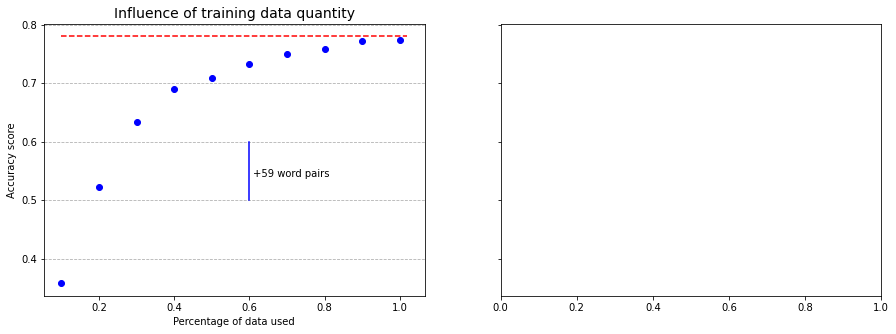

In [27]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(1,2, figsize=(15, 5), sharey=True)

ax[0].set_title('Influence of training data quantity', fontsize=14)
ax[0].scatter(data=data, x="percentage", y="evalScore", color="blue")
ax[0].plot([0.1,1.02], [0.78,0.78], color="red", linestyle="--")
ax[0].grid(True, axis="y", linestyle="--")
ax[0].set_xlabel("Percentage of data used")
ax[0].set_ylabel("Accuracy score")
ax[0].plot([0.6, 0.6], [0.5, 0.6], color="blue")
ax[0].text(0.61, 0.54, "+59 word pairs")